# How to use the generator

This notebook shows how to use the library to generate sparse stochastic processes.




First `import` the necessary files :

In [1]:
from lib.lspline import L_spline
from lib.loperator import Operator
from lib.white_noise import white_noise

## Setting the white noise


In the library, there is the possiblity to choose among the four following white noise processes :
<ul>
    <li> Gaussian </li>
    <li> Alpha-Stable </li>
    <li> Laplace </li>
    <li> Gamma </li>
</ul>
 

The following block of code shows how to contruct all four types of white noise.

In [22]:
w_gauss = white_noise('gaussian', params=(0,1))
w_alpha_stable = white_noise('alpha_stable', params=(1, 0, 0, 1))
w_laplace = white_noise('laplace', params=(0,1))
w_gamma = white_noise('gamma', params=(1, 1))

The parametrization of the laws follows the one provided on the Wikipedia page of each law.

# Defining the operator

The framework allows for rational operators of the form
$$
P(\mathrm{D})Q(\mathrm{D})^{-1}
$$
The polynomials $P$ and $Q$ are defined through the list of their coefficients :
* $P(\mathrm{D}) = p_0 \mathrm{D}^n + p_1 \mathrm{D}^{n-1} + ... + p_n$ is represented as  ``` P = [p_0, ..., p_n ]```
* $Q(\mathrm{D}) = q_0 \mathrm{D}^m + q_1 \mathrm{D}^{m-1} + ... + q_m$ is represented as  ``` Q = [q_0, ..., q_m ]```


Defining the operator consists of providing both lists `P` and `Q`. For example to define the operator
$$
\mathrm{L} = P(\mathrm{D})Q(\mathrm{D})^{-1} \text{ with } P(\mathrm{D}) = {\mathrm{D}^2 + 4\mathrm{Id}} \quad \text{ and } Q(\mathrm{D}) = \mathrm{D},
$$
write :

In [3]:
L = Operator(P = [1, 0, 4], Q = [1, 0])

## Defining the sparse stochastic process solving $\mathrm{L} s = w$


Here is how to define $s$ for the different types of innovations defined previously :

In [4]:
s_gauss = L_spline(L, w_gauss)
s_alpha_stable = L_spline(L, w_alpha_stable)
s_laplace = L_spline(L, w_laplace)
s_gamma = L_spline(L, w_gamma)

#### Setting the approximation quality with $n$:

The compound Poisson Approximation is chosen to have the rate $\lambda = n$. 

Set it as follows :

In [5]:
s_gauss.set_lambda(100)

#### Sampling and evaluating the process :

Pick an interval $[0, T]$ on which to sample the process and sample it as follows :

In [6]:
s_gauss.sample(T=10)

You can then evaluate `s_gauss` at any point $t\in[0,T]$ like so :

In [7]:
s_gauss.eval(5)

0.7903192539229389

## Visualizing the process on a grid

This section describes how to use the library to visualize the process on the interval `[0, T]` sampled on a regular grid with step size `h`.

In [16]:
T = 1
h = 0.01

Since there should be at least one impulse per bin, set $\lambda = n$ as follows :

In [17]:
s_gauss.set_lambda(2 * 1/h)

Then sample the process on `[0, T]` and obtain its grid values like so :

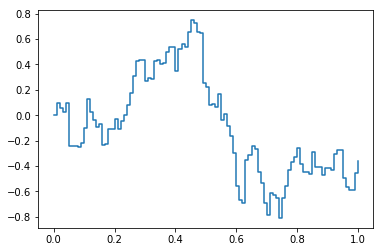

In [20]:
s_gauss.sample(T)
grid_samples = s_gauss.get_grid_samples(T, h)